In [4]:
#TASK 1 LOADING THE DATA SET


In [5]:
#Tasks
#1. Data Exploration and Preprocessing
#Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
#Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
#Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

In [6]:
import pandas as pd
ds=pd.read_csv("blogs.csv")
ds

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [65]:
#INSTALLING NLTK PACKAGE...

In [7]:
pip install pandas nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
# Specify the path to your .txt file
file_path = 'blogs.csv'

# Open and read the contents of the file
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()




In [12]:
# Tokenize the text
from nltk.tokenize import word_tokenize

words = word_tokenize(text_data)
words

['Data',
 ',',
 'Labels',
 "''",
 'Path',
 ':',
 'cantaloupe.srv.cs.cmu.edu',
 '!',
 'magnesium.club.cc.cmu.edu',
 '!',
 'news.sei.cmu.edu',
 '!',
 'cis.ohio-state.edu',
 '!',
 'zaphod.mps.ohio-state.edu',
 '!',
 'howland.reston.ans.net',
 '!',
 'agate',
 '!',
 'doc.ic.ac.uk',
 '!',
 'uknet',
 '!',
 'mcsun',
 '!',
 'Germany.EU.net',
 '!',
 'thoth.mchp.sni.de',
 '!',
 'horus.ap.mchp.sni.de',
 '!',
 'D012S658',
 '!',
 'frank',
 'From',
 ':',
 'frank',
 '@',
 'D012S658.uucp',
 '(',
 'Frank',
 "O'Dwyer",
 ')',
 'Newsgroups',
 ':',
 'alt.atheism',
 'Subject',
 ':',
 'Re',
 ':',
 'islamic',
 'genocide',
 'Date',
 ':',
 '23',
 'Apr',
 '1993',
 '23:51:47',
 'GMT',
 'Organization',
 ':',
 'Siemens-Nixdorf',
 'AG',
 'Lines',
 ':',
 '110',
 'Distribution',
 ':',
 'world',
 'Message-ID',
 ':',
 '<',
 '1r9vej',
 '$',
 '5k5',
 '@',
 'horus.ap.mchp.sni.de',
 '>',
 'References',
 ':',
 '<',
 '1r4o8a',
 '$',
 '6qe',
 '@',
 'fido.asd.sgi.com',
 '>',
 '<',
 '1r5ubl',
 '$',
 'bd6',
 '@',
 'horus.ap.mchp.s

In [13]:
# Convert all words to lowercase
words2 = [i.lower() for i in words]
words2


['data',
 ',',
 'labels',
 "''",
 'path',
 ':',
 'cantaloupe.srv.cs.cmu.edu',
 '!',
 'magnesium.club.cc.cmu.edu',
 '!',
 'news.sei.cmu.edu',
 '!',
 'cis.ohio-state.edu',
 '!',
 'zaphod.mps.ohio-state.edu',
 '!',
 'howland.reston.ans.net',
 '!',
 'agate',
 '!',
 'doc.ic.ac.uk',
 '!',
 'uknet',
 '!',
 'mcsun',
 '!',
 'germany.eu.net',
 '!',
 'thoth.mchp.sni.de',
 '!',
 'horus.ap.mchp.sni.de',
 '!',
 'd012s658',
 '!',
 'frank',
 'from',
 ':',
 'frank',
 '@',
 'd012s658.uucp',
 '(',
 'frank',
 "o'dwyer",
 ')',
 'newsgroups',
 ':',
 'alt.atheism',
 'subject',
 ':',
 're',
 ':',
 'islamic',
 'genocide',
 'date',
 ':',
 '23',
 'apr',
 '1993',
 '23:51:47',
 'gmt',
 'organization',
 ':',
 'siemens-nixdorf',
 'ag',
 'lines',
 ':',
 '110',
 'distribution',
 ':',
 'world',
 'message-id',
 ':',
 '<',
 '1r9vej',
 '$',
 '5k5',
 '@',
 'horus.ap.mchp.sni.de',
 '>',
 'references',
 ':',
 '<',
 '1r4o8a',
 '$',
 '6qe',
 '@',
 'fido.asd.sgi.com',
 '>',
 '<',
 '1r5ubl',
 '$',
 'bd6',
 '@',
 'horus.ap.mchp.s

In [14]:
len(words)

922719

In [15]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
stopwords_list


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
# Remove stop words
#words3 = [word for word in words2 if word not in stopwords_list]
#words3

words3 = []

for word in words2:
    if word not in stopwords_list:
        words3.append(word)

words3

print("after stopwords:", len(words3))



after stopwords: 678149


In [17]:
922719/678149

1.360643457411277

In [66]:
#IMPORTING PUNCTUATIONS FROM STRING...

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~.....''``'s'''

words_without_punctuation = []

for word in words3:
    if word not in punctuations:
        words_without_punctuation.append(word)


print("removing the punctuations: ",len(words_without_punctuation))

removing the punctuations:  437458


In [67]:
#IMPORTING PORTER STEMMER FOR STEMMING WORDS...

In [20]:
from nltk.stem import PorterStemmer

porter_stemmer = PorterStemmer()

stemmed_words = [porter_stemmer.stem(word) for word in words_without_punctuation]

print(len(stemmed_words))



437458


In [68]:
#OBSERVING THE MOST REPEATED WORDS FROM THE STEMMED WORDS...

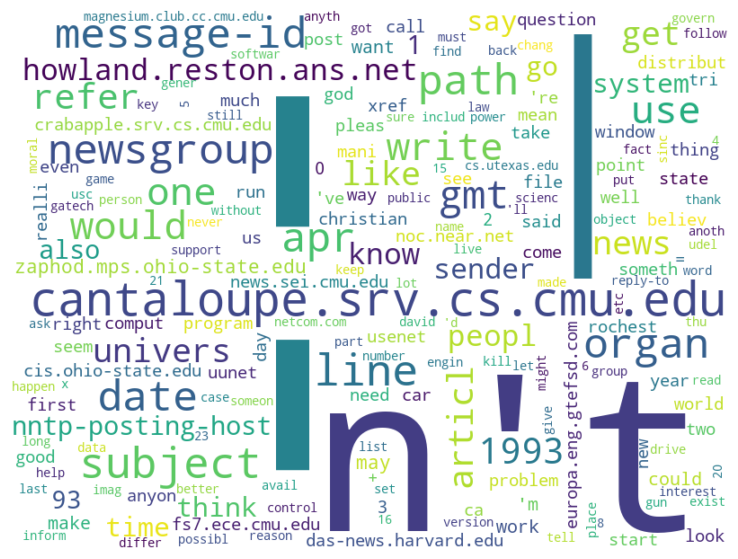

In [23]:
# Create a dictionary to store the word frequency
word_counts = {}

for word in stemmed_words:
  if word not in word_counts:
    word_counts[word] = 0
  word_counts[word] += 1


# Create the word cloud
wordcloud = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [26]:
#observing the words from the above wordcloud that are most repeatedly shown...
#artic1,date,also,n't,cantaloupe.srv.cs.cmu.edu,message-id,howland.reston.ans.net...

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words4 = [word for word in stemmed_words if word not in ["n't", "cantaloupe.srv.cs.cmu.edu", "message-id", "newsgroup",
                                                         'howland.reston.ans.net','articl','date','line','apr','say','also']]

len(words4)

417149

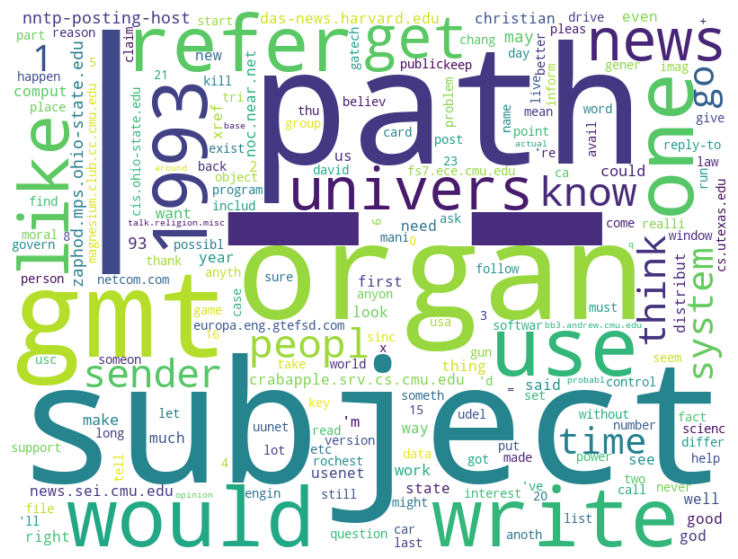

In [28]:
# Create a dictionary to store the word frequency
word_counts = {}

for word in words4:
  if word not in word_counts:
    word_counts[word] = 0
  word_counts[word] += 1


# Create the word cloud
wordcloud = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [69]:
#JOINING THE WORDS INTO THE DOCUMENT AFTER DOING ALL THE PRE-PROCESSING STEPS...

In [29]:
doc = " ".join(words4)
doc


"data label path magnesium.club.cc.cmu.edu news.sei.cmu.edu cis.ohio-state.edu zaphod.mps.ohio-state.edu agat doc.ic.ac.uk uknet mcsun germany.eu.net thoth.mchp.sni.d horus.ap.mchp.sni.d d012s658 frank frank d012s658.uucp frank o'dwyer alt.ath subject islam genocid 23 1993 23:51:47 gmt organ siemens-nixdorf ag 110 distribut world 1r9vej 5k5 horus.ap.mchp.sni.d refer 1r4o8a 6qe fido.asd.sgi.com 1r5ubl bd6 horus.ap.mchp.sni.d 1r76ek 7uo fido.asd.sgi.com nntp-posting-host d012s658.ap.mchp.sni.d 1r76ek 7uo fido.asd.sgi.com livesey solntze.wpd.sgi.com jon livesey write 1r5ubl bd6 horus.ap.mchp.sni.d frank d012s658.uucp frank o'dwyer write | 1r4o8a 6qe fido.asd.sgi.com livesey solntze.wpd.sgi.com jon livesey write | | note particular societi case mainland uk | relig motiv murder murder | kind littl whether inter-religion murder elsewher | religi motiv | | allow one conclud noth inher | religion matter catholic protestant | motiv one kill motiv allow christian bibl one may kill certain circum

In [30]:
##COUNT VECTORIZER

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


In [32]:
# Create a CountVectorizer object with ngram_range=(2, 2) to extract bigrams
vect = CountVectorizer(ngram_range=(2, 2))

# Fit the vectorizer to the document
counts = vect.fit_transform([doc])
counts

<1x280205 sparse matrix of type '<class 'numpy.int64'>'
	with 280205 stored elements in Compressed Sparse Row format>

In [33]:
# Get the vocabulary of the vectorizer
vocab = vect.get_feature_names_out()
vocab

array(['00 00', '00 01', '00 02', ..., 'zz2q1 4js0', 'zzs 7kd4',
       'zzx 1am'], dtype=object)

In [64]:
#N-GRAM LANGUAGE MODELS..

In [70]:
#In NLP, Term Frequency – Inverse Document Frequency is known as TF-IDF. 

#In the field of natural language processing, which primarily studies human languages,

#it is a much discussed subject. 
#The first step in any text processing process is preprocessing, or cleaning the text.

#Moreover, the cleaned data must be transformed into a numerical representation using word vectors, or matrices, to represent each word. 

#Another name for this is word embedding.

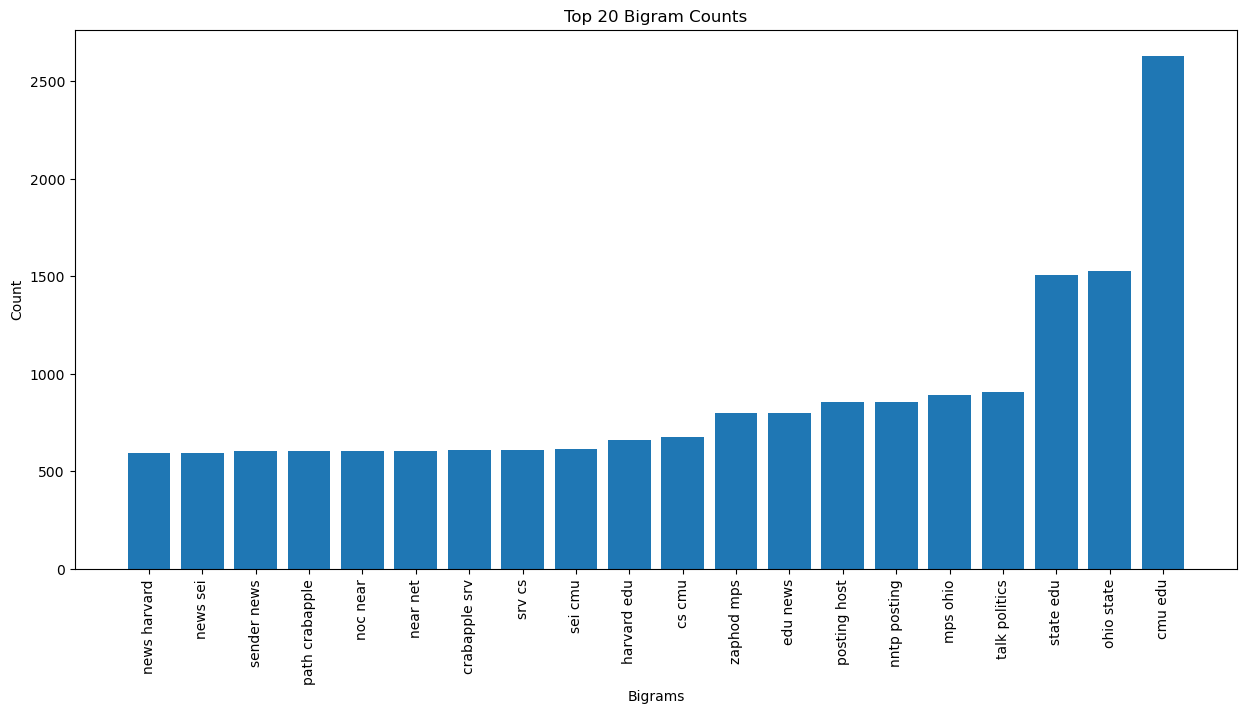

In [34]:
# Get the top 20 bigram counts
top_20_bigrams = counts.toarray().sum(axis=0).argsort()[-20:]

# Create a bar chart of the top 20 bigram counts
plt.figure(figsize=(15, 7))
plt.bar(vocab[top_20_bigrams], counts.toarray()[0, top_20_bigrams])
plt.xticks(rotation=90)
plt.xlabel("Bigrams")
plt.ylabel("Count")
plt.title("Top 20 Bigram Counts")
plt.show()


In [36]:
#observing trigrams

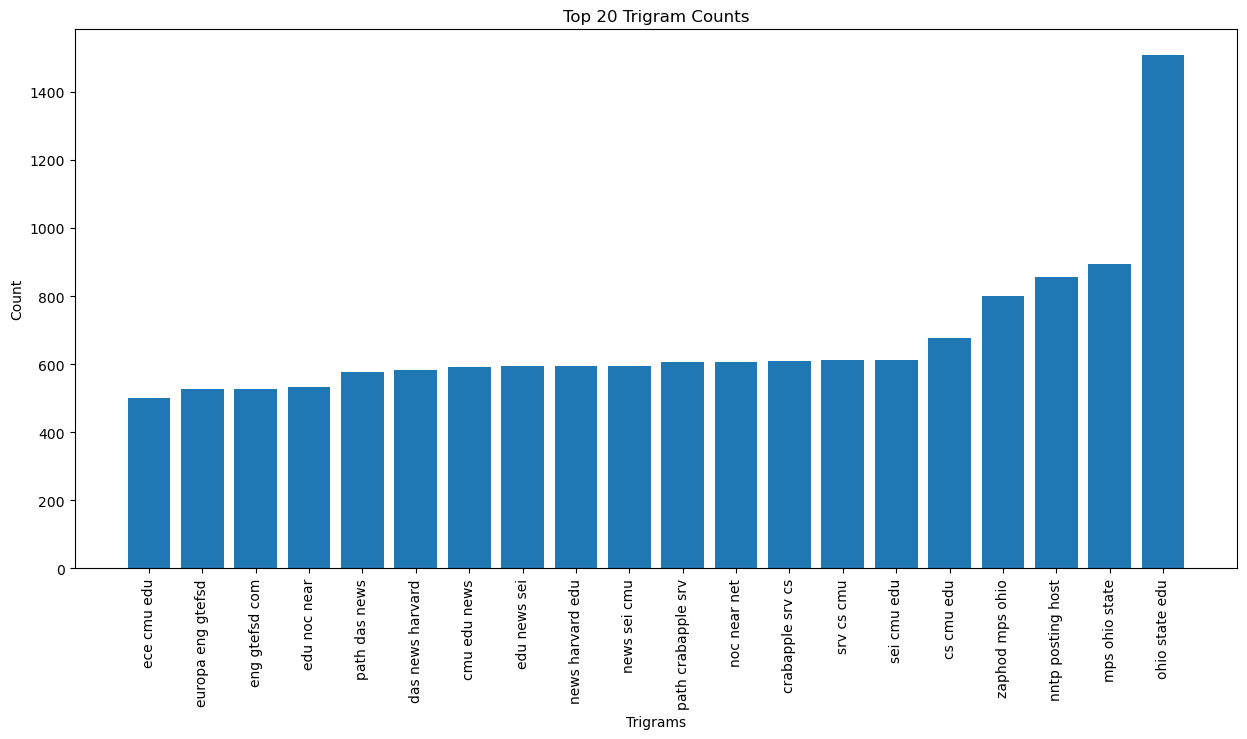

In [37]:
# Create a CountVectorizer object with ngram_range=(3, 3) to extract trigrams
vect = CountVectorizer(ngram_range=(3, 3))

# Fit the vectorizer to the document
counts = vect.fit_transform([doc])
counts


# Get the vocabulary of the vectorizer
vocab = vect.get_feature_names_out()
vocab

# Get the top 20 trigram counts
top_20_trigrams = counts.toarray().sum(axis=0).argsort()[-20:]

# Create a bar chart of the top 20 trigram counts
plt.figure(figsize=(15, 7))
plt.bar(vocab[top_20_trigrams], counts.toarray()[0, top_20_trigrams])
plt.xticks(rotation=90)
plt.xlabel("Trigrams")
plt.ylabel("Count")
plt.title("Top 20 Trigram Counts")
plt.show()



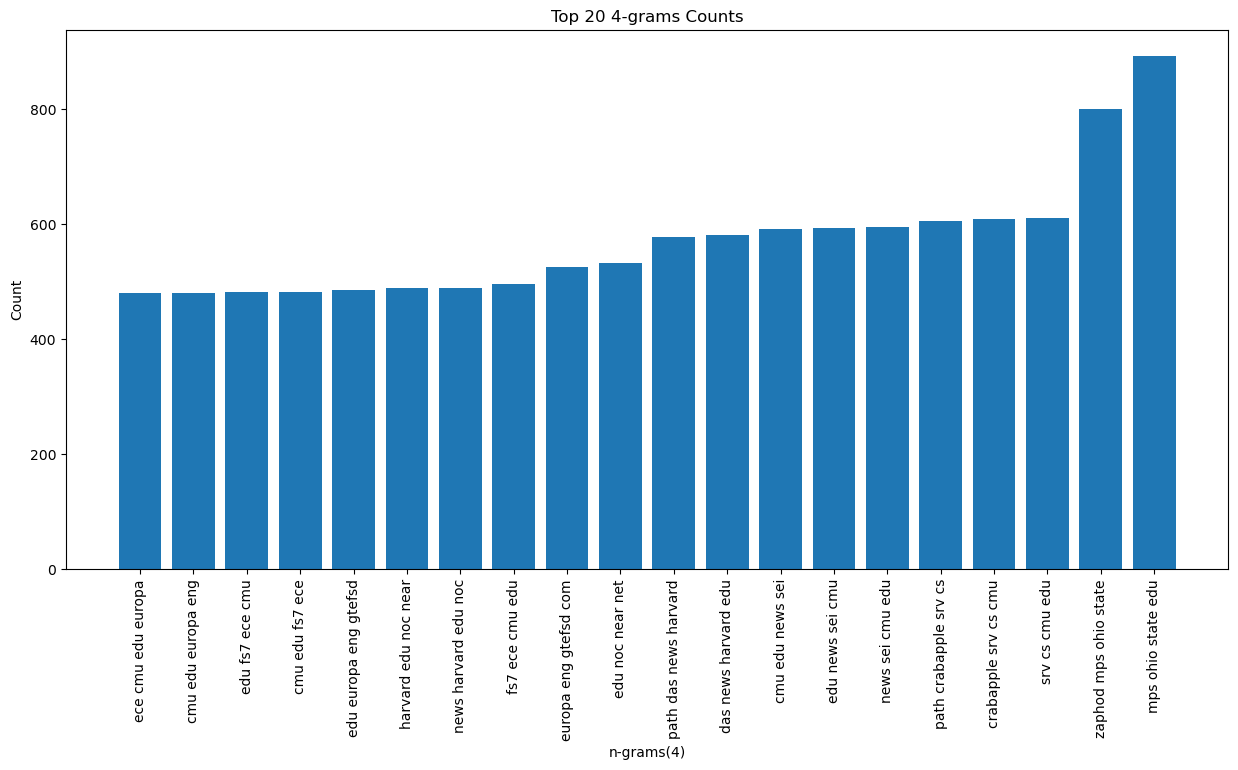

In [73]:
# Create a CountVectorizer object with ngram_range=(4,4) to extract n-grams
vect = CountVectorizer(ngram_range=(4,4))

# Fit the vectorizer to the document
counts = vect.fit_transform([doc])
counts


# Get the vocabulary of the vectorizer
vocab = vect.get_feature_names_out()
vocab

# Get the top 20 4-grams counts
top_20_4grams = counts.toarray().sum(axis=0).argsort()[-20:]

# Create a bar chart of the top 20 4-grams counts
plt.figure(figsize=(15, 7))
plt.bar(vocab[top_20_4grams], counts.toarray()[0, top_20_4grams])
plt.xticks(rotation=90)
plt.xlabel("n-grams(4)")
plt.ylabel("Count")
plt.title("Top 20 4-grams Counts")
plt.show()



In [74]:
#3. Sentiment Analysis
#Choose a suitable library or method for performing sentiment analysis on the blog post texts.

#Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. 

#Consider only the Data column and get the sentiment for each blog.

#Examine the distribution of sentiments across different categories and summarize your findings.

In [38]:
# read  every line from above df_final and convert in to either positive or negative statment and save under a new column


In [39]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to C:\Users\Hima
[nltk_data]     Chandana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
ds['Data,Labels'] = ds['Data'] + ds['Labels']
ds

,Data,Labels,"Data,Labels"
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....


In [75]:
#combining data and labels in to observe sentiment column...

In [44]:
ds.drop(ds.columns[[0,1]],axis=1,inplace=True)
ds

,"Data,Labels"
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....


In [45]:
# Create a new column for sentiment
ds['Sentiment_0'] = ds['Data,Labels'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
ds.head()


,"Data,Labels",Sentiment_0
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9966
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,0.8856
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,-0.9969
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9999
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0.9821


In [46]:
# Classify each statement as positive or negative based on the sentiment score
ds['Sentiment'] = ds['Sentiment_0'].apply(lambda x: 'positive' if x > 0 else 'negative')
ds

,"Data,Labels",Sentiment_0,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9966,negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,0.8856,positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,-0.9969,negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9999,negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0.9821,positive
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,0.9706,positive
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,0.8327,positive
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,0.9387,positive
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,0.9914,positive


In [47]:
ds["Sentiment"].value_counts()

positive    1334
negative     666
Name: Sentiment, dtype: int64

In [48]:
ds['Data,Labels'] = ds['Data,Labels'].str.lower()
ds.head()


,"Data,Labels",Sentiment_0,Sentiment
0,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9966,negative
1,newsgroups: alt.atheism\npath: cantaloupe.srv....,0.8856,positive
2,path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,-0.9969,negative
3,path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-0.9999,negative
4,xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,0.9821,positive


In [49]:
import string
ds['Data,Labels'] = ds['Data,Labels'].str.replace('[{}]'.format(string.punctuation), '')
ds.head()

C:\Users\Hima Chandana\AppData\Local\Temp\ipykernel_14428\2797725089.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ds['Data,Labels'] = ds['Data,Labels'].str.replace('[{}]'.format(string.punctuation), '')


,"Data,Labels",Sentiment_0,Sentiment
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-0.9966,negative
1,newsgroups altatheism\npath cantaloupesrvcscmu...,0.8856,positive
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,-0.9969,negative
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-0.9999,negative
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,0.9821,positive


In [76]:
#implementing lemmatiztion...

In [50]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


ds['Data,Labels'] = ds['Data,Labels'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
ds.head()


[nltk_data] Downloading package wordnet to C:\Users\Hima
[nltk_data]     Chandana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,"Data,Labels",Sentiment_0,Sentiment
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-0.9966,negative
1,newsgroups altatheism path cantaloupesrvcscmue...,0.8856,positive
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,-0.9969,negative
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-0.9999,negative
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,0.9821,positive


In [77]:
#removing the stop words...

In [51]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

ds['Data,Labels'] = ds['Data,Labels'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
ds.head()

[nltk_data] Downloading package stopwords to C:\Users\Hima
[nltk_data]     Chandana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,"Data,Labels",Sentiment_0,Sentiment
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-0.9966,negative
1,newsgroups altatheism path cantaloupesrvcscmue...,0.8856,positive
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,-0.9969,negative
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,-0.9999,negative
4,xref cantaloupesrvcscmuedu altatheism53485 tal...,0.9821,positive


In [52]:
ds.value_counts()

Data,Labels                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [54]:
Y = ds["Sentiment"]
x = ds['Data,Labels']


In [78]:
#splitting target and training data...

In [55]:
Y

0       negative
1       positive
2       negative
3       negative
4       positive
          ...   
1995    positive
1996    positive
1997    positive
1998    positive
1999    negative
Name: Sentiment, Length: 2000, dtype: object

In [57]:
Y.value_counts()

positive    1334
negative     666
Name: Sentiment, dtype: int64

In [56]:
x

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: Data,Labels, Length: 2000, dtype: object

In [79]:
#In NLP, Term Frequency – Inverse Document Frequency is known as TF-IDF. 

#In the field of natural language processing, which primarily studies human languages,

#it is a much discussed subject. The first step in any text processing process is preprocessing,

#or cleaning the text.

#Moreover, the cleaned data must be transformed into a numerical representation using word vectors, 

#or matrices, to represent each word. 




In [58]:
# Caluculatinb TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)
x_new = X.toarray()
x_new = pd.DataFrame(x_new)
x_new.to_csv("newdata.csv")
x_new

,0,1,2,3,4,5,6,7,8,9,...,53487,53488,53489,53490,53491,53492,53493,53494,53495,53496
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
#4. Evaluation
#Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

#Discuss the performance of the model and any challenges encountered during the classification process.

#Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

In [59]:
# Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20)

In [60]:
#fitting the naive bayes model
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [61]:
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

In [62]:
#metrics
from sklearn.metrics import accuracy_score
ac1=accuracy_score(Y_train,Y_pred_train)
print("Training accuracy:",ac1.round(3))
ac2=accuracy_score(Y_test,Y_pred_test)
print("Test accuracy:",ac2.round(3))

Training accuracy: 0.687
Test accuracy: 0.702


In [63]:
# Calculate accuracy
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(Y_test,Y_pred_test)

# Calculate precision, recall, and F1-score for each class
precision = precision_score(Y_test,Y_pred_test,average='weighted')
recall = recall_score(Y_test,Y_pred_test, average='weighted')
f1 = f1_score(Y_test,Y_pred_test, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(Y_test,Y_pred_test))

Accuracy: 0.70
Precision: 0.79
Recall: 0.70
F1 Score: 0.58

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.01      0.02       120
    positive       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.85      0.50      0.42       400
weighted avg       0.79      0.70      0.58       400

